In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'data/preprocessed_combined_dataset.csv'
df = pd.read_csv(file_path, low_memory=False)

# Display basic info about the dataset
print("Dataset Information:")
print(df.info())

# Display the first few rows
print("Sample Data:")
print(df.head())

# Handle missing values for relevant columns
df.fillna(df.median(numeric_only=True), inplace=True)


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 68 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                286392 non-null  object 
 1   order_date              79948 non-null   object 
 2   status                  286392 non-null  object 
 3   item_id                 286392 non-null  int64  
 4   sku                     286392 non-null  object 
 5   qty_ordered             286392 non-null  float64
 6   price_x                 286392 non-null  float64
 7   value                   286392 non-null  float64
 8   discount_amount         286392 non-null  float64
 9   total                   286392 non-null  float64
 10  category                286392 non-null  object 
 11  payment_method          286392 non-null  object 
 12  bi_st                   286392 non-null  object 
 13  cust_id                 286392 non-null  int64  
 14 

In [4]:
# Select relevant features
features = df[['price_x', 'discount_amount', 'category_encoded', 'Region_encoded_x']]
target = df['qty_ordered']

# Check for missing values
print("Missing values in features:\n", features.isnull().sum())
print("Missing values in target:\n", target.isnull().sum())

# Ensure no missing values in features and target
features.fillna(features.median(), inplace=True)
target.fillna(target.median(), inplace=True)


Missing values in features:
 price_x             0
discount_amount     0
category_encoded    0
Region_encoded_x    0
dtype: int64
Missing values in target:
 0


C:\Users\linke\AppData\Local\Temp\ipykernel_4928\561451937.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.fillna(features.median(), inplace=True)


In [6]:
from sklearn.model_selection import train_test_split

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Check the shape of the data splits
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (200474, 4)
Testing data shape: (85918, 4)


In [8]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Display the coefficients of the model
coefficients = pd.DataFrame({
    'Feature': features.columns,
    'Coefficient': model.coef_
})
print("Feature Coefficients:")
print(coefficients)


Feature Coefficients:
            Feature  Coefficient
0           price_x    -0.000428
1   discount_amount     0.000782
2  category_encoded     0.022856
3  Region_encoded_x    -0.003129


In [14]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Model Performance:\nR2 Score: {r2:.2f}\nRMSE: {rmse:.2f}")


Model Performance:
R2 Score: 0.15
RMSE: 0.85


In [16]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Calculate Adjusted R²
n = X_test.shape[0]  # Number of observations
k = X_test.shape[1]  # Number of predictors
adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - k - 1)
print(f"Adjusted R² Score: {adjusted_r2:.2f}")


Mean Absolute Error (MAE): 0.68
Mean Absolute Percentage Error (MAPE): 28.72%
Adjusted R² Score: 0.15


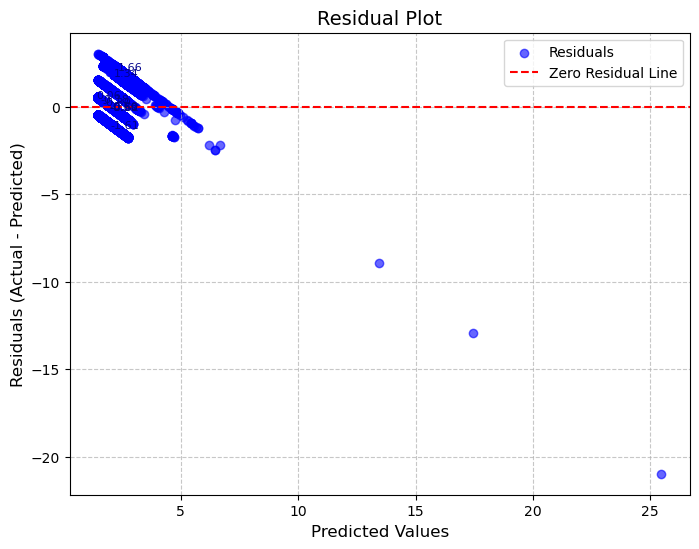

In [47]:
# Ensure residuals and predictions are aligned
residuals = y_test.values - y_pred  # Calculate residuals if not already done

# Residual Plot with labels
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='blue', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')

# Adding labels only for the first 10 points for clarity
for i in range(min(10, len(residuals))):  # Add labels for the first 10 residuals
    plt.annotate(f'{residuals[i]:.2f}', (y_pred[i], residuals[i]), 
                 textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8, color='darkblue')

# Titles and axis labels
plt.title('Residual Plot', fontsize=14)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)

# Add grid and legend
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.show()


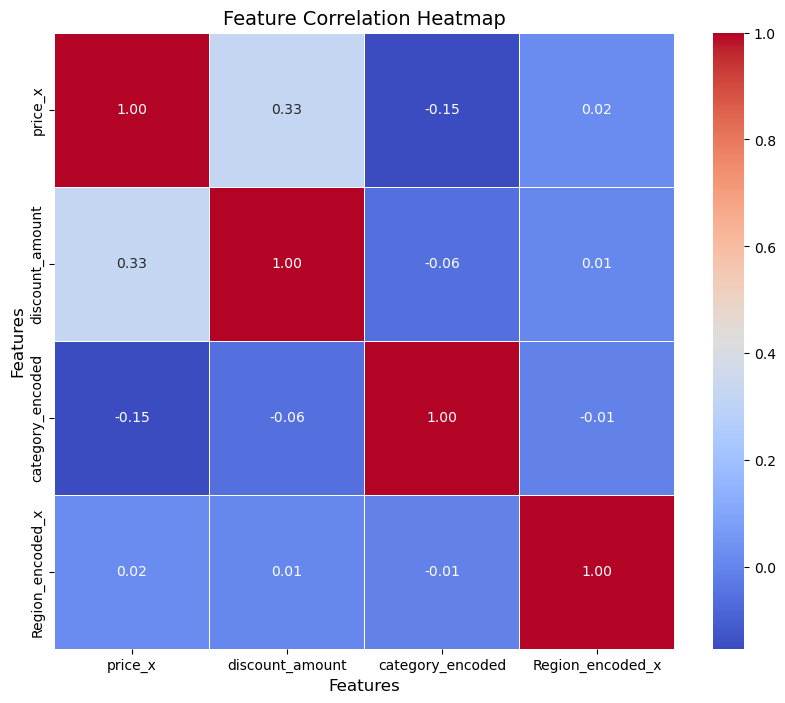

In [39]:
# Correlation heatmap with labels
plt.figure(figsize=(10, 8))
sns.heatmap(features.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()


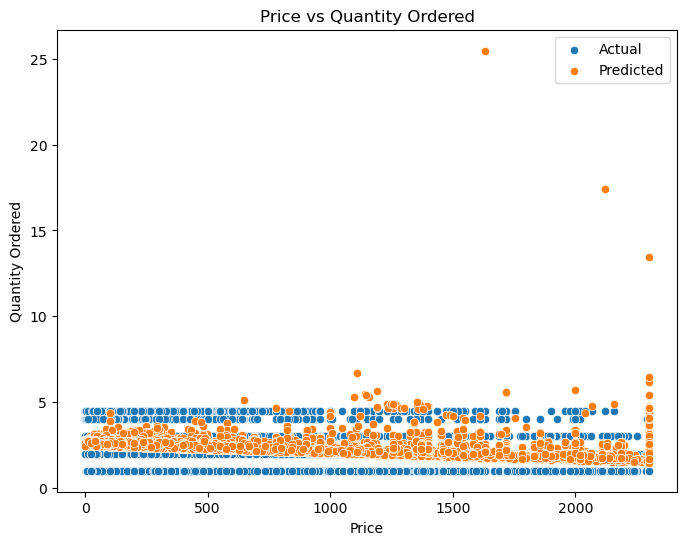

In [21]:
# Scatter plot: Price vs Quantity Ordered
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test['price_x'], y=y_test, label='Actual')
sns.scatterplot(x=X_test['price_x'], y=y_pred, label='Predicted')
plt.title('Price vs Quantity Ordered')
plt.xlabel('Price')
plt.ylabel('Quantity Ordered')
plt.legend()
plt.show()


In [37]:
# Display metrics table with labels
metrics_summary.rename(columns={'Metric': 'Evaluation Metric', 'Value': 'Metric Value'}, inplace=True)
metrics_summary.index += 1  # Start index from 1
print(metrics_summary)


  Evaluation Metric  Metric Value
1                R²      0.154457
2       Adjusted R²      0.154417
3              RMSE      0.851044
4               MAE      0.678358
5              MAPE     28.721691


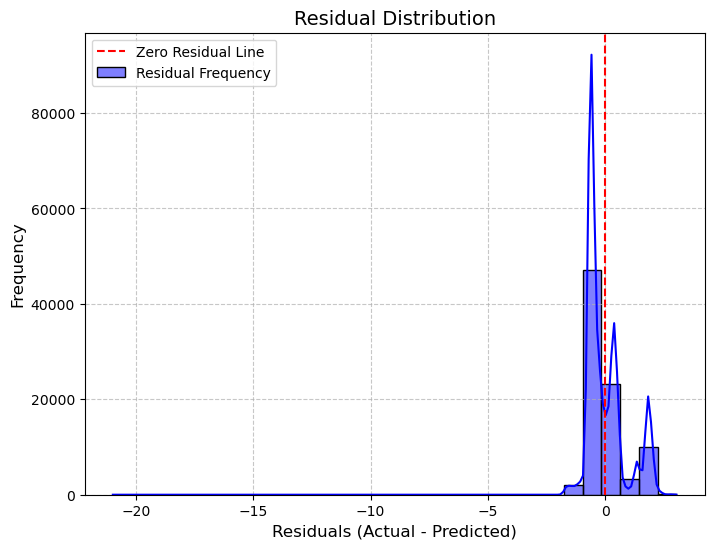

In [41]:
# Residual Distribution with labels
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color='blue', label='Residual Frequency')
plt.axvline(x=0, color='red', linestyle='--', label='Zero Residual Line')
plt.title('Residual Distribution', fontsize=14)
plt.xlabel('Residuals (Actual - Predicted)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


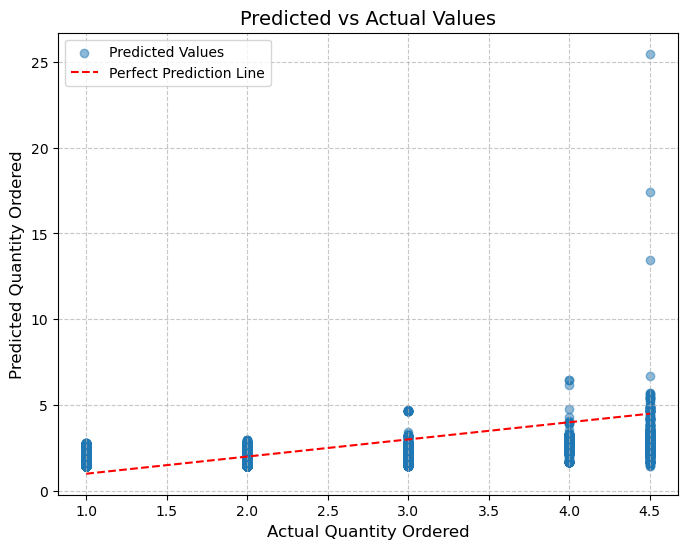

In [43]:
# Predicted vs Actual values with labels
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction Line')
plt.title('Predicted vs Actual Values', fontsize=14)
plt.xlabel('Actual Quantity Ordered', fontsize=12)
plt.ylabel('Predicted Quantity Ordered', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
